<a href="https://colab.research.google.com/github/Khansa-Gulshad/Khansa-Gulshad/blob/main/geopandas_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [ ]:
!pip install sodapy

In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily

In [ ]:
!pip install esda

In [ ]:
!pip install splot

In [12]:
!pip uninstall rtree
!pip install spatial_access
!pip install rtree

Found existing installation: Rtree 0.9.7
Uninstalling Rtree-0.9.7:
  Would remove:
    /usr/local/lib/python3.7/site-packages/Rtree-0.9.7.dist-info/*
    /usr/local/lib/python3.7/site-packages/Rtree.libs/libspatialindex-bf66e7c6.so.6.1.1
    /usr/local/lib/python3.7/site-packages/rtree/*
Proceed (y/n)? y
  Successfully uninstalled Rtree-0.9.7
     |████████████████████████████████| 287 kB 5.5 MB/s 
     |████████████████████████████████| 280 kB 55.3 MB/s 
     |████████████████████████████████| 132 kB 49.5 MB/s 
     |████████████████████████████████| 1.9 MB 36.5 MB/s 
     |████████████████████████████████| 5.9 MB 30.5 MB/s 
  Using cached Rtree-0.9.7-cp37-cp37m-manylinux2010_x86_64.whl (994 kB)
     |████████████████████████████████| 379 kB 60.4 MB/s 
  Created wheel for atlas: filename=atlas-0.27.0-py3-none-any.whl size=48019 sha256=dbf43b5891d993f3cb298ffac6a1edc0937853bf7ac42a251a05594b2529fb43
  Stored in directory: /root/.cache/pip/wheels/03/de/34/5a43bd5301aa0862ca33611c66b7aaa

In [14]:
gdf=gpd.read_file('/content/drive/MyDrive/geopandas_exercise/acs2019_5yr_B01003_15000US060371992011.geojson')

In [15]:
gdf.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",1688.0,337.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",1614.0,341.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",981.0,288.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",2156.0,388.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",1249.0,313.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [16]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2516 non-null   object  
 1   name              2516 non-null   object  
 2   B01003001         2516 non-null   float64 
 3   B01003001, Error  2516 non-null   float64 
 4   geometry          2516 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 98.4+ KB


In [17]:
gdf=gdf[['geoid','B01003001','geometry']]

In [18]:
gdf.columns=['FIPS','TotalPopu','geometry']

In [19]:
gdf.tail()

,FIPS,TotalPopu,geometry
2511,15000US060379800261,26.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,1175.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2515,16000US0644000,3966936.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [20]:
gdf=gdf.drop(2515)

In [21]:
gdf['FIPS']=gdf['FIPS'].str.replace('15000US','')
gdf.tail()

,FIPS,TotalPopu,geometry
2510,060379800241,223.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2511,060379800261,26.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,060379800311,1175.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [22]:
gdf.sort_values(by='TotalPopu').head(20)

,FIPS,TotalPopu,geometry
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2358,060372772002,0.0,"MULTIPOLYGON (((-118.38597 33.94734, -118.3859..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2509,060379800231,0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
2506,060379800201,0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
2508,060379800221,0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
2501,060379800091,5.0,"MULTIPOLYGON (((-118.33707 34.14160, -118.3361..."
2503,060379800141,9.0,"MULTIPOLYGON (((-118.26088 33.76850, -118.2602..."
2511,060379800261,26.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2507,060379800211,33.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017..."


In [23]:
gdf = gdf[gdf['TotalPopu']>100]

In [24]:
gdf.to_crs(epsg=3857)

,FIPS,TotalPopu,geometry
0,060371011101,1688.0,"MULTIPOLYGON (((-13168130.287 4063777.973, -13..."
1,060371011102,1614.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13..."
2,060371011103,981.0,"MULTIPOLYGON (((-13169185.150 4064208.314, -13..."
3,060371011221,2156.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13..."
4,060371011222,1249.0,"MULTIPOLYGON (((-13168066.056 4064987.278, -13..."
...,...,...,...
2498,060379302001,367.0,"MULTIPOLYGON (((-13181379.644 4068073.896, -13..."
2504,060379800151,671.0,"MULTIPOLYGON (((-13170262.055 3997538.878, -13..."
2505,060379800191,138.0,"MULTIPOLYGON (((-13202401.217 4038791.402, -13..."
2510,060379800241,223.0,"MULTIPOLYGON (((-13193418.068 4053521.172, -13..."


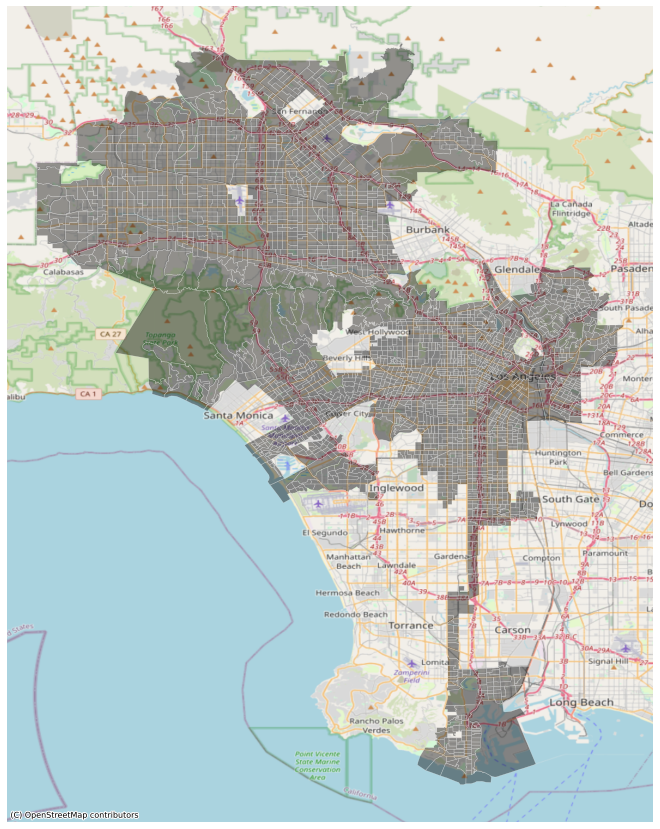

In [25]:
#plot it
fig, ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
         color='black',
         edgecolor='white',
         lw=0.5,
         alpha=0.4
)
ax.axis('off') #no axis
# add a basemap
ctx.add_basemap(ax,crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

In [26]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("amvf-fr72", 
                     limit=50000,
                     where = "arst_date between '2020-07-01T00:00:00' and '2021-01-31T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame

In [27]:
# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

In [28]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           36631 non-null  object
 1   report_type      36631 non-null  object
 2   arst_date        36631 non-null  object
 3   time             36630 non-null  object
 4   area             36631 non-null  object
 5   area_desc        36631 non-null  object
 6   rd               36631 non-null  object
 7   age              36631 non-null  object
 8   sex_cd           36631 non-null  object
 9   descent_cd       36631 non-null  object
 10  chrg_grp_cd      34105 non-null  object
 11  grp_description  34100 non-null  object
 12  arst_typ_cd      36631 non-null  object
 13  charge           36631 non-null  object
 14  chrg_desc        34105 non-null  object
 15  dispo_desc       34460 non-null  object
 16  location         36631 non-null  object
 17  crsst            19215 non-null

In [ ]:
arrests.head()

In [30]:
from shapely import geometry
arrests=gpd.GeoDataFrame(arrests,crs='EPSG:4326',
                         geometry=gpd.points_from_xy(arrests.lon, arrests.lat))

In [ ]:
# get the layers into a web mercator projection
# reproject to web mercator
arrests.to_crs(epsg=3857)

In [32]:
# convert lat/lon to floats
arrests.lon=arrests.lon.astype('float')
arrests.lat=arrests.lat.astype('float')

/usr/local/lib/python3.7/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


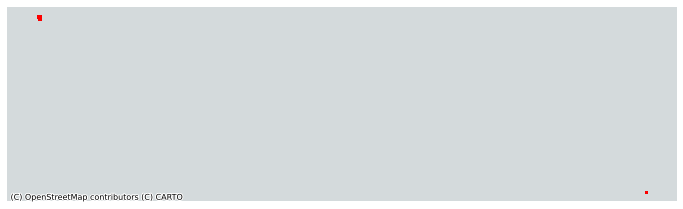

In [33]:
#map it
fig, ax=plt.subplots(figsize=(12,12))
arrests.plot(ax=ax,
             color='red',
             markersize=1)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# subset the zero coordinate records
arrests[arrests.lon==0]

In [36]:
# drop the unmapped rows
arrests = arrests[arrests.lon!=0]

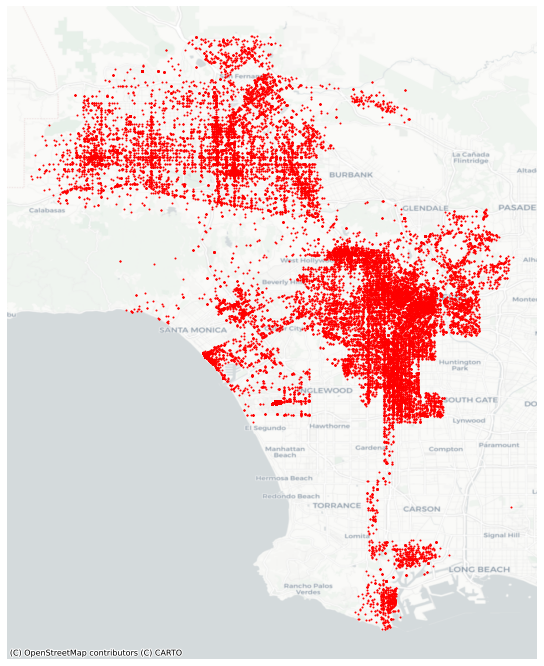

In [41]:
#map it again
fig, ax=plt.subplots(figsize=(12,12))
arrests.plot(ax=ax,
             color='red',
             markersize=1)
ax.axis('off')
ctx.add_basemap(ax,crs=arrests.crs, source=ctx.providers.CartoDB.Positron)

In [103]:
#create a two layer map
# get the bounding box for arrests

In [38]:
minx, miny, maxx, maxy=arrests.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxx)

-118.6612
33.7064
-118.1569
-118.1569


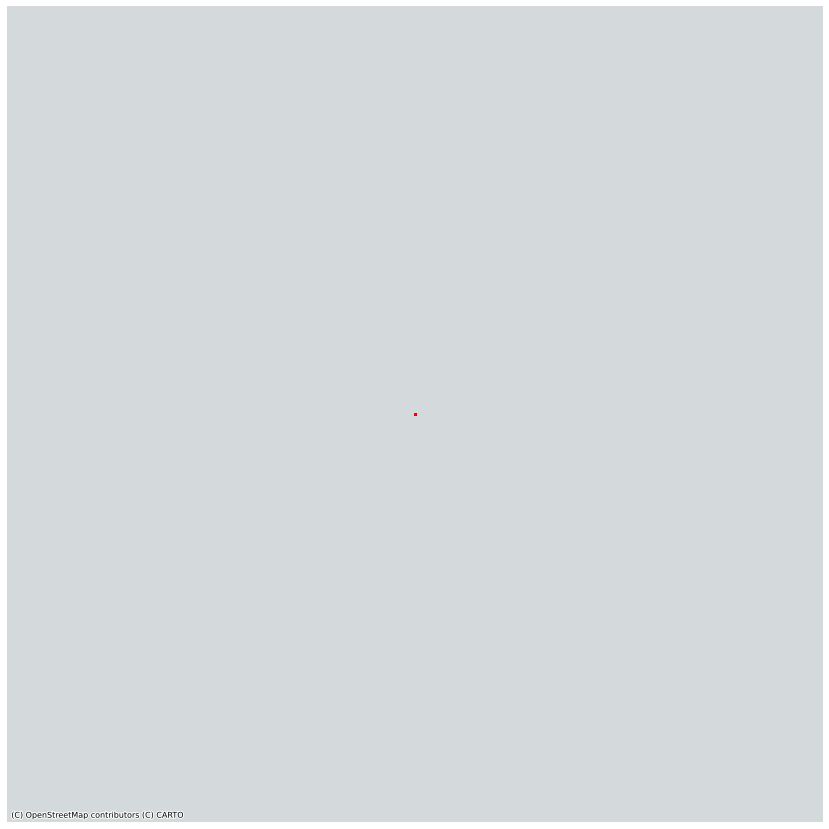

In [44]:
#sub plot for multilayer maps
fig,ax=plt.subplots(1,1, figsize=(15,15))
gdf.plot(ax=ax,
         color='gray',
         edgecolor='white',
         alpha=0.5
)
arrests.plot(ax=ax,
             color='red',
             markersize=1,
             alpha=0.2)
# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx-1000,maxx+1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny-1000,maxy+1000)
ax.axis('off')
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [40]:
# Do the spatial join
join=gpd.sjoin(arrests, gdf, how='left')
join.head()

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,lon,location_1,bkg_date,bkg_time,bgk_location,bkg_loc_cd,geometry,index_right,FIPS,TotalPopu
0,6116629,BOOKING,2021-01-31T00:00:00.000,2015,12,77th Street,1266,27,M,B,...,-118.2783,"{'type': 'Point', 'coordinates': [-118.2783, 3...",2021-01-31T00:00:00.000,2216,77TH ST,4212,POINT (-118.27830 33.96420),1956.0,060372397012,1959.0
2,6116639,BOOKING,2021-01-31T00:00:00.000,1705,21,Topanga,2136,22,M,H,...,-118.5990,"{'type': 'Point', 'coordinates': [-118.599, 34...",2021-01-31T00:00:00.000,2237,VALLEY - JAIL DIV,4279,POINT (-118.59900 34.20100),685.0,060371345202,2351.0
6,6116641,BOOKING,2021-01-31T00:00:00.000,1330,06,Hollywood,0645,32,M,H,...,-118.3391,"{'type': 'Point', 'coordinates': [-118.3391, 3...",2021-01-31T00:00:00.000,2243,HOLLYWOOD,4206,POINT (-118.33910 34.10160),1000.0,060371901002,1578.0
7,6116331,BOOKING,2021-01-31T00:00:00.000,0200,19,Mission,1917,19,M,B,...,-118.4409,"{'type': 'Point', 'coordinates': [-118.4409, 3...",2021-01-31T00:00:00.000,0828,VALLEY - JAIL DIV,4279,POINT (-118.44090 34.31070),110.0,060371064081,2896.0
9,6116168,BOOKING,2021-01-31T00:00:00.000,0005,19,Mission,1918,38,F,H,...,-118.4350,"{'type': 'Point', 'coordinates': [-118.435, 34...",2021-01-31T00:00:00.000,0235,VALLEY - JAIL DIV,4279,POINT (-118.43500 34.30610),99.0,060371064031,1141.0
